# Name Surfer

Based on NameSurfer assignment Stanford CS106A - Programming Methodology https://see.stanford.edu/materials/icspmcs106a/39-assignment-6-name-surfer.pdf

The data is from SSA https://www.ssa.gov/OACT/babynames/limits.html

Instead of using Java to create it, use Python and the graphics and dashboard tools.
It would be a fun enhancement to see a kind of heat map of a name on the continental us. For a given name, the color of the state would represent the popularity in that state. Can we see a migration of names? 

I would also like to see the appearance of names in states and how they change rank over time.

In [217]:
# Read the CSV files with 
# State abbreviation,Sex,Year, Name, Number of occurrences
import pandas as pd
import datetime
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
t_df = pd.DataFrame(columns=['State','Sex','Year','Name','NumOccurrences'])

In [6]:
t_df

,State,Sex,Year,Name,NumOccurrences


In [75]:
# Create an empty DataFrame since the files don't have headers
names_df = pd.DataFrame(columns=['State','Sex','Year','Name','NumOccurrences'])

files_path = Path('E:/UserLo/source/repos/learning/Name Surfer/NamesByState')
files_list = list (files_path.glob('*.txt'))
for f in files_list:
    with f.open("r") as f_h:
        state_df = pd.read_csv(f_h,header=None,names=['State','Sex','Year','Name','NumOccurrences'])
        names_df=pd.concat([names_df,state_df],axis=0, copy=False)


In [25]:
state_df.head()

,State,Sex,Year,Name,NumOccurrences
0,AL,F,1910,Mary,875
1,AL,F,1910,Annie,482
2,AL,F,1910,Willie,257
3,AL,F,1910,Mattie,232
4,AL,F,1910,Ruby,204


In [76]:
##names_df['Year'] = pd.to_datetime(names_df['Year'])

names_df = names_df.astype({'Year':'int32','NumOccurrences': 'int32'})

In [77]:
names_df.head()

,State,Sex,Year,Name,NumOccurrences
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [78]:
names_df.dtypes

State             object
Sex               object
Year               int32
Name              object
NumOccurrences     int32
dtype: object

In [65]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166799 entries, 0 to 137442
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   State           166799 non-null  object        
 1   Sex             166799 non-null  object        
 2   Year            166799 non-null  datetime64[ns]
 3   Name            166799 non-null  object        
 4   NumOccurrences  166799 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 7.0+ MB


In [67]:
state_df.sort_values('NumOccurrences', ascending=False).head()

,State,Sex,Year,Name,NumOccurrences
92518,AL,M,1947,James,3038
90438,AL,M,1943,James,2899
93599,AL,M,1949,James,2837
93050,AL,M,1948,James,2773
89930,AL,M,1942,James,2736


In [162]:
def compute_rank(df,state,sex, year, name):
    """
    Given the state, sex, year and name determine the rank for the sex and overall rank.
    All the names with the same count will get the same rank. There are many names that have same count.
    """
    # df[(df['State']==state) &  (df['Sex']==sex) & (df['Year']==year) & (df['Name']==name)]
    #return df[(df['State']==state) &  (df['Sex']==sex) & (df['Year']==year)].groupby(by='NumOccurrences').count().sort_values(by='NumOccurrences',ascending=False).reset_index()
    # Find number of occurrences for a given name
    name_row = df[(df['State']==state) &  (df['Sex']==sex) & (df['Year']==year) &  (df['Name']==name)]
    if not(name_row.empty): # Name exists for the given state, sex, year
        name_occurrence = name_row.reset_index().at[0,'NumOccurrences']
    
        # Create a DataFrame grouped by NumOccurrances.
        # Recall that many names will have the same number of occurrences.
        name_occurrences_df = df[(df['State']==state) &  (df['Sex']==sex) & (df['Year']==year)].groupby(by='NumOccurrences').count().reset_index()

        # The rank is computed by summing the number of occurrences greater than the currnet name occurrence and adding 1
        return name_occurrences_df[name_occurrences_df['NumOccurrences']>name_occurrence]['Name'].sum() + 1
    else: # Name does not exist for the given state, sex, year so return 0
        return 0
    


In [156]:
name_row = names_df[(names_df['State']=='AL') &  (names_df['Sex']=='M') & (names_df['Year']==1947) &  (names_df['Name']=='Zazoo')]

In [163]:
t= compute_rank(names_df,'AL','M',1947,'zazoo')
t

0

In [149]:
compute_rank(names_df,'AK','F',1910,'Margaret')

4

In [168]:
ll= [['n', 1910,1],['n',1911,2]]

In [171]:
ll_df = pd.DataFrame(ll,columns=['Name','Year','Rank'])

In [172]:
ll_df

,Name,Year,Rank
0,n,1910,1
1,n,1911,2


In [175]:
def compute_rank_df(df,state,sex, year_range, name):
    rank_list=[]
    for y in year_range:
        rank_list.append([name, y, compute_rank(df,state,sex,y,name)])
    
    return pd.DataFrame(rank_list,columns=['Name','Year','Rank'])

In [177]:
t= compute_rank_df(names_df,'AL','M',range(1960,2000,1),'James')

In [178]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    40 non-null     object
 1   Year    40 non-null     int64 
 2   Rank    40 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [266]:
%matplotlib inline

In [311]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [268]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [295]:
fig.gca()

<AxesSubplot:>

In [ ]:
b= compute_rank_df(names_df,'AL','M',range(1960,2000,1),'Robert')

AxesSubplot(0.125,0.125;0.775x0.755)


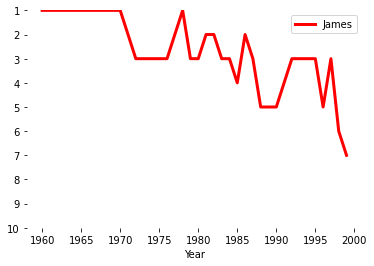

In [296]:
ax= t.plot(x='Year',y='Rank',kind='line',ylim=(10,1), color='red', linewidth=3, label= t.at[0,'Name']) # (t['Rank'].max(), t['Rank'].min()))
ax.set_frame_on(False)
# b.plot(x='Year',y='Rank', ax=ax,kind='line', ylim=(100,1), color='green', linewidth=3, label= b.at[0,'Name'])
print (aax:=fig.gca())
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


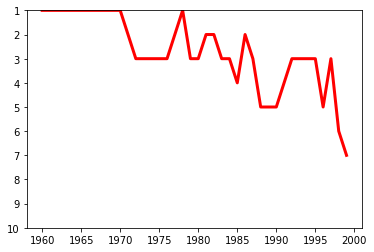

In [317]:
plt.plot('Year','Rank',data=t,color='red', linewidth=3, label= t.at[0,'Name'])
plt.ylim(10,1)
print(fig.gca())

In [309]:
fig.gca()

<AxesSubplot:>

In [299]:
line_list = ax.get_lines()
line_list

<a list of 1 Line2D objects>

In [300]:
plt.get_fignums()

[]

In [277]:
b.plot(x='Year',y='Rank', ax=ax,kind='line', ylim=(10,1), color='green', linewidth=3, label= b.at[0,'Name'])

<AxesSubplot:xlabel='Year'>

In [301]:
fig.gca()

<AxesSubplot:>

AxesSubplot(0.125,0.125;0.775x0.755)


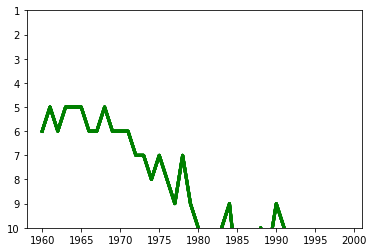

In [323]:
fig.gca().set_ylim(ymin=10,ymax=1)
fig.gca().plot('Year','Rank',data=b,color='green', linewidth=3, label= b.at[0,'Name'])
#fig.gca().set_ylim(ymin=10,ymax=1)
print(fig.gca())
fig

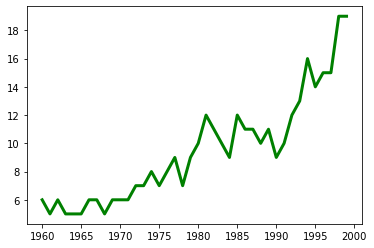

In [303]:
fig

In [304]:
plt.gcf().show()

C:\Users\Lloyd\AppData\Local\Temp\ipykernel_25304\3610945503.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.gcf().show()


<Figure size 432x288 with 0 Axes>

In [282]:
import numpy as np

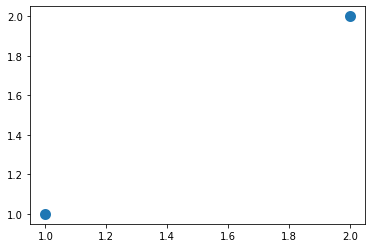

In [305]:
x = np.arange(1,3)
y = x
x2 = np.arange(3,11)
y2 = x2
x3 = np.arange(11,21)
y3 = x3

# Create initial figure
fig = plt.figure()
plt.scatter(x, y, linewidth=5)

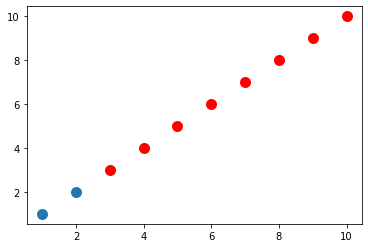

In [306]:
fig.gca().scatter(x2, y2, color='r', linewidth=5)
fig